## Online Retailer RFM Behavior Data Analysis

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns 

In [6]:
retail=pd.read_excel('/Users/fanliu/Downloads/Online_Retail.xlsx') 

In [7]:
data=retail 

In [8]:
data.head(10)
data.describe() 
%timeit data.isnull().sum()
data.columns

182 ms ± 7.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
#check the number of NaN values in each col in the dataset (after you convert "missing values" to NaN)
data.isnull().sum() 
data[data['Description'] == '?'] 
?pd.DataFrame.dropna()
#drop only if na is in a specific column 
new_data=data.dropna(subset=['CustomerID']) #subset=[], put colname directly in [], no need to add data[]

In [10]:
#make the date range a full year
new_data['InvoiceDate'].describe()
new_data=new_data[new_data['InvoiceDate']>='2010-12-09']

In [11]:
new_data['InvoiceDate'].describe()
new_data['Country'].describe() 
new_data.Country.unique() 
new_data=new_data[new_data['Country']=='United Kingdom']
new_data.Country.unique()

array(['United Kingdom'], dtype=object)

In [12]:
len(new_data.InvoiceNo.unique())

19140

In [13]:
len(new_data.CustomerID.unique())

3891

In [14]:
len(new_data.InvoiceNo) #349806
len(str(new_data.InvoiceNo)) #1083
str(new_data.InvoiceNo)
#convert col datatype by using apply
new_data.CustomerID=new_data.CustomerID.apply(int)

In [15]:
new_data.InvoiceNo=new_data.InvoiceNo.apply(str)

In [16]:
new_data['Return']= ['C' in i for i in new_data.InvoiceNo]

In [17]:
new_data['Return'].head(10)
new_data['Return']=new_data['Return'].apply(str)

In [18]:
?np.where

In [19]:
new_data['Purchase']=np.where(new_data['Return']=='True',0,1) 

In [20]:
new_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,Purchase
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243,United Kingdom,False,1
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243,United Kingdom,False,1
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243,United Kingdom,False,1
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243,United Kingdom,False,1
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243,United Kingdom,False,1


In [21]:
#create customer-level data
customers=pd.DataFrame(new_data.CustomerID.unique())

In [22]:
customers.columns=['CustomerID'] 
customers.head(5)

,CustomerID
0,14243
1,12963
2,15513
3,15079
4,14437


In [23]:
#recency
sys.path

['',
 '/anaconda3/lib/python36.zip',
 '/anaconda3/lib/python3.6',
 '/anaconda3/lib/python3.6/lib-dynload',
 '/anaconda3/lib/python3.6/site-packages',
 '/anaconda3/lib/python3.6/site-packages/aeosa',
 '/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/fanliu/.ipython']

In [24]:

new_data['InvoiceDate2']= pd.to_datetime(new_data['InvoiceDate']) #no coerce

In [25]:
new_data['InvoiceDate2'].head(5)

19632   2010-12-09 08:34:00
19633   2010-12-09 08:34:00
19634   2010-12-09 08:34:00
19635   2010-12-09 08:34:00
19636   2010-12-09 08:34:00
Name: InvoiceDate2, dtype: datetime64[ns]

In [26]:
#here when you get difference between two to_datetime, the new col will be timedelta format
new_data['Recency']=pd.to_datetime('2011-12-10')-new_data['InvoiceDate2']

In [27]:
new_data['Recency'][5000:5020]

28437   361 days 10:08:00
28438   361 days 10:08:00
28439   361 days 10:08:00
28440   361 days 10:08:00
28441   361 days 10:08:00
28442   361 days 10:08:00
28443   361 days 10:08:00
28444   361 days 10:08:00
28445   361 days 09:44:00
28446   361 days 09:44:00
28447   361 days 09:44:00
28448   361 days 09:44:00
28449   361 days 09:44:00
28450   361 days 09:44:00
28451   361 days 09:44:00
28452   361 days 09:44:00
28453   361 days 09:44:00
28454   361 days 09:44:00
28455   361 days 09:44:00
28456   361 days 09:44:00
Name: Recency, dtype: timedelta64[ns]

In [28]:
#delete row based on some col values
new_data=new_data[new_data.Purchase!=0]

In [29]:
new_data.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,Purchase,InvoiceDate2,Recency
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243,United Kingdom,False,1,2010-12-09 08:34:00,365 days 15:26:00


In [30]:
recency=new_data.groupby('CustomerID')['Recency'].min() #remember this!

In [31]:
recency=pd.DataFrame(recency)
recency=recency.reset_index()

In [32]:
recency.head() 

,CustomerID,Recency
0,12346,325 days 13:59:00
1,12747,2 days 09:26:00
2,12748,0 days 11:40:00
3,12749,3 days 14:04:00
4,12820,3 days 08:48:00


In [33]:
customers=customers.merge(recency, on='CustomerID')

In [34]:
customers.head(5)

,CustomerID,Recency
0,14243,8 days 12:48:00
1,12963,8 days 11:05:00
2,15513,33 days 09:24:00
3,15079,212 days 11:15:00
4,14437,365 days 14:33:00


In [35]:
#for timedelta format, you need to use .days() to extract days
customers.Recency=customers.Recency.dt.days  #pd.Series.dt.days: number of days for each element

In [36]:
customers.Recency.head()
customers.Recency.dtype

dtype('int64')

In [37]:
new_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,Purchase,InvoiceDate2,Recency
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243,United Kingdom,False,1,2010-12-09 08:34:00,365 days 15:26:00
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243,United Kingdom,False,1,2010-12-09 08:34:00,365 days 15:26:00
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243,United Kingdom,False,1,2010-12-09 08:34:00,365 days 15:26:00
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243,United Kingdom,False,1,2010-12-09 08:34:00,365 days 15:26:00
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243,United Kingdom,False,1,2010-12-09 08:34:00,365 days 15:26:00


In [38]:
#frequency
customer_invoices=pd.DataFrame(new_data[['CustomerID','InvoiceNo','Purchase']])
customer_invoices.head()

,CustomerID,InvoiceNo,Purchase
19632,14243,537879,1
19633,14243,537879,1
19634,14243,537879,1
19635,14243,537879,1
19636,14243,537879,1


In [39]:
customer_invoices=customer_invoices.drop_duplicates()
customer_invoices.head()

,CustomerID,InvoiceNo,Purchase
19632,14243,537879,1
19640,12963,537880,1
19656,15513,537881,1
19668,15079,537882,1
19672,14437,537883,1


In [40]:

customer_invoices=customer_invoices.sort_values('CustomerID')
customer_invoices.head()

,CustomerID,InvoiceNo,Purchase
61619,12346,541431,1
241991,12747,558265,1
64849,12747,541677,1
175871,12747,551992,1
308314,12747,563949,1


In [41]:
customer_invoices.head()

,CustomerID,InvoiceNo,Purchase
61619,12346,541431,1
241991,12747,558265,1
64849,12747,541677,1
175871,12747,551992,1
308314,12747,563949,1


In [42]:
invoices=pd.DataFrame(customer_invoices.groupby('CustomerID')['Purchase'].sum())

In [43]:
invoices=invoices.reset_index()

In [44]:
invoices.head()

,CustomerID,Purchase
0,12346,1
1,12747,10
2,12748,196
3,12749,5
4,12820,4


In [45]:
invoices.columns.values

array(['CustomerID', 'Purchase'], dtype=object)

In [46]:

invoices.columns.values[1]='Frequency'


In [47]:
invoices.head()

,CustomerID,Frequency
0,12346,1
1,12747,10
2,12748,196
3,12749,5
4,12820,4


In [48]:
customers.head() 

,CustomerID,Recency
0,14243,8
1,12963,8
2,15513,33
3,15079,212
4,14437,365


In [49]:
invoices.columns=invoices.columns.str.strip()

In [50]:
invoices.Frequency
customers=customers.merge(invoices, on='CustomerID',sort=True)

In [51]:
customers=customers[customers.Frequency>0]

In [52]:
#monetary values of purchase
new_data.head()
new_data['Amount']=new_data['Quantity']*new_data['UnitPrice']

In [53]:
new_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,Purchase,InvoiceDate2,Recency,Amount
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243,United Kingdom,False,1,2010-12-09 08:34:00,365 days 15:26:00,47.4
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243,United Kingdom,False,1,2010-12-09 08:34:00,365 days 15:26:00,37.2
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243,United Kingdom,False,1,2010-12-09 08:34:00,365 days 15:26:00,15.3
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243,United Kingdom,False,1,2010-12-09 08:34:00,365 days 15:26:00,31.8
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243,United Kingdom,False,1,2010-12-09 08:34:00,365 days 15:26:00,15.9


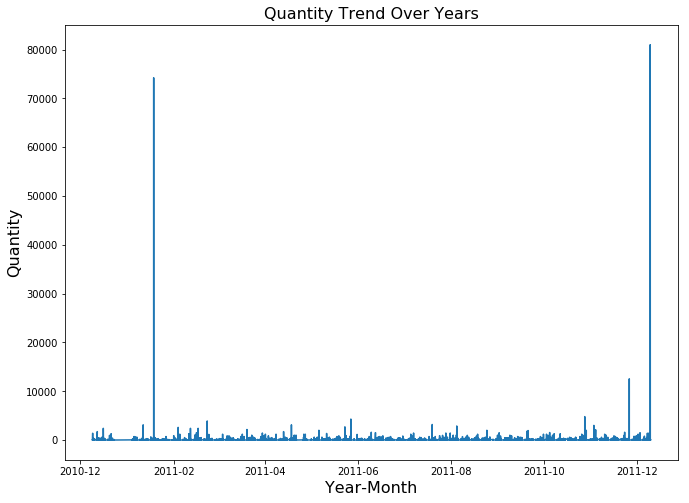

In [54]:
plt.figure(figsize=(11,8))
plt.plot(new_data.InvoiceDate, new_data.Quantity)
plt.title('Quantity Trend Over Years',fontsize=16)
plt.xlabel('Year-Month',fontsize=16)
plt.ylabel('Quantity',fontsize=16)
plt.show()

In [55]:
monetary=pd.DataFrame(new_data.groupby('CustomerID')['Amount'].sum())
monetary.head()

,Amount
CustomerID,
12346,77183.60
12747,3837.45
12748,31854.58
12749,4090.88
12820,942.34


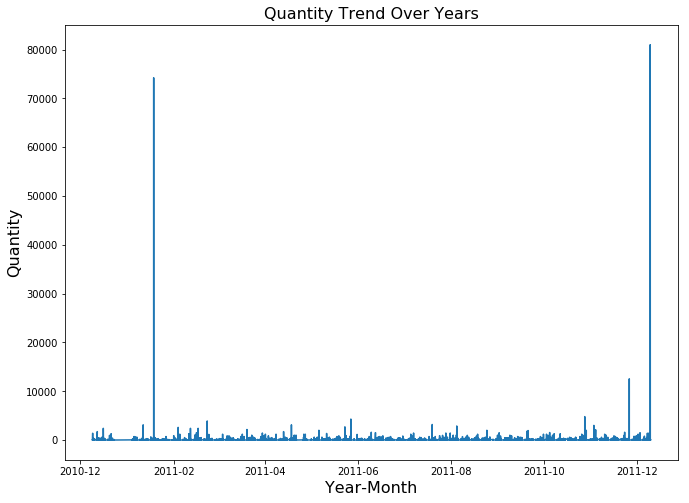

In [56]:
plt.figure(figsize=(11,8))
plt.plot(new_data.InvoiceDate, new_data.Quantity)
plt.title('Quantity Trend Over Years',fontsize=16)
plt.xlabel('Year-Month',fontsize=16)
plt.ylabel('Quantity',fontsize=16)
plt.show()

In [57]:
monetary=monetary.reset_index()  

In [58]:
customers=customers.merge(monetary,on='CustomerID')

In [59]:
customers.columns.values[3]='Monetary'

In [60]:
customers.columns=customers.columns.str.strip()

In [61]:
customers['Monetary']=np.where(customers['Monetary']<0, 0, customers['Monetary'])

In [62]:
customers[customers.Monetary==0]

,CustomerID,Recency,Frequency,Monetary
310,13256,14,1,0.0


In [63]:
customers[customers.Monetary<0]

,CustomerID,Recency,Frequency,Monetary


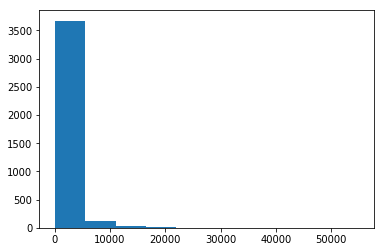

In [64]:
#his
plt.hist(customers.Monetary, range=(0,55000))
plt.show()


In [65]:
#80/20 rule: 80%sales may come from only 20% customers
#These 20% represent the high-value, important customers a business would want to protect.
#it doesn't have to be 20%
?pd.DataFrame.sort_values

In [66]:
customers=customers.sort_values('Monetary', ascending=False)


In [67]:
cutoff=0.8*customers.Monetary.sum()
cutoff

5646700.091200009

In [68]:
customers['Pareto']=np.where(np.cumsum(customers.Monetary)<=cutoff, 'Top 20%', 'Bottom 80%')

In [69]:
#count the number of True in a col 
np.sum(customers.Pareto=='Top 20%')  

1069

In [70]:
1069/len(customers.Pareto) #27.67% are customers we need to focus on

0.2767279316593321

In [71]:
customers=customers.sort_values('CustomerID')

In [72]:
#top20% custoemrs
customer_top20=customers[customers.Pareto=='Top 20%']
customer_top20.head()

,CustomerID,Recency,Frequency,Monetary,Pareto
0,12346,325,1,77183.60,Top 20%
1,12747,2,10,3837.45,Top 20%
2,12748,0,196,31854.58,Top 20%
3,12749,3,5,4090.88,Top 20%
7,12823,74,5,1759.50,Top 20%


In [73]:

customers.head()
customers['RecencyLog']=np.where(customers.Recency==0,0.001,np.log(customers.Recency))


In [74]:
customers['FrequencyLog']=np.where(customers.Frequency==0,0.001,np.log(customers.Frequency))
customers['MonetaryLog']=np.where(customers.Monetary==0,0.001,np.log(customers.Monetary))

In [75]:
customers.head()
customers['RecencyScale']=preprocessing.scale(customers['RecencyLog'])

In [76]:
customers['FrequencyScale']=preprocessing.scale(customers['FrequencyLog'])
customers['MonetaryScale']=preprocessing.scale(customers['MonetaryLog'])

In [77]:
customers.head()

,CustomerID,Recency,Frequency,Monetary,Pareto,RecencyLog,FrequencyLog,MonetaryLog,RecencyScale,FrequencyScale,MonetaryScale
0,12346,325,1,77183.60,Top 20%,5.783825,0.000000,11.253942,1.425140,-1.042054,3.795425
1,12747,2,10,3837.45,Top 20%,0.693147,2.302585,8.252563,-2.057858,1.537518,1.383611
2,12748,0,196,31854.58,Top 20%,0.001000,5.278115,10.368936,-2.531419,4.870985,3.084262
3,12749,3,5,4090.88,Top 20%,1.098612,1.609438,8.316515,-1.780442,0.760989,1.435001
4,12820,3,4,942.34,Bottom 80%,1.098612,1.386294,6.848366,-1.780442,0.511003,0.255243


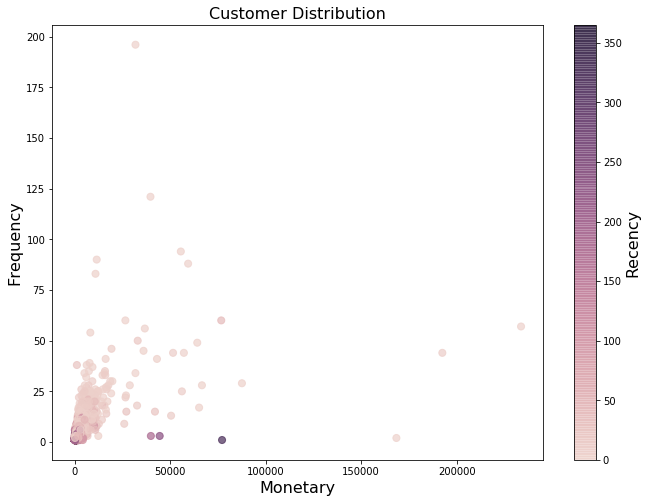

In [78]:
#visaulize the data
fig=plt.figure(figsize=(11, 8))
cmap = sns.cubehelix_palette(as_cmap=True)
ax = fig.add_subplot(111)

#for i in range(len(customers.Pareto)):
#plt.scatter(xs[i], ys[i], marker=m[i])
points=ax.scatter(customers.Monetary, customers.Frequency, c=customers.Recency,s=50, cmap=cmap, alpha=0.7)
   

ax.set_xlabel('Monetary', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_title('Customer Distribution', fontsize=16)

cbar=fig.colorbar(points)
#cbar.ax.set_yticklabels('Recency')  #change the scale of colorbar
cbar.ax.set_ylabel('Recency', fontsize=16)

plt.show()

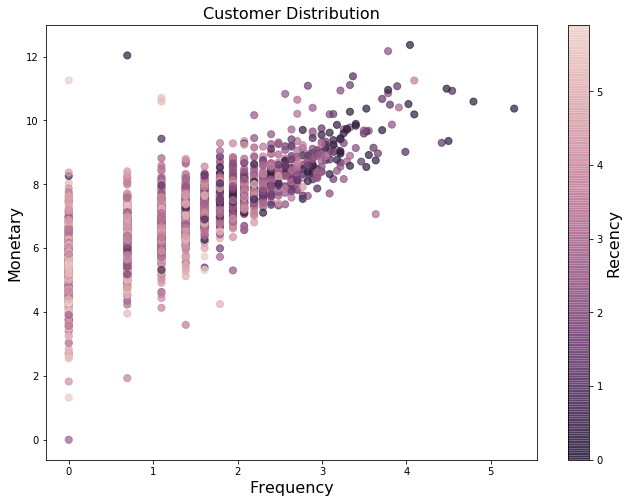

In [79]:
#using original dataset makes the graph not interpretable, so we need to plot trandformed data 
#visaulize the data
fig2=plt.figure(figsize=(11, 8))
cmap = sns.cubehelix_palette(reverse=True,as_cmap=True) #reverse you can change color darkness scale
ax2 = fig2.add_subplot(111)

#for i in range(len(customers.Pareto)):
#plt.scatter(xs[i], ys[i], marker=m[i])
points=ax2.scatter(customers.FrequencyLog,customers.MonetaryLog,c=customers.RecencyLog,s=50, cmap=cmap, alpha=0.7)
   

ax2.set_xlabel('Frequency', fontsize=16)
ax2.set_ylabel('Monetary', fontsize=16)
ax2.set_title('Customer Distribution', fontsize=16)

cbar=fig2.colorbar(points)
#cbar.ax.set_yticklabels('Recency')  #change the scale of colorbar
cbar.ax.set_ylabel('Recency', fontsize=16)

plt.show()


In [80]:
#get rid of outliers

#Count number of True in a col
np.sum(customers.MonetaryLog<0)
np.sum(customers.Monetary<0)
np.sum(customers.MonetaryLog<0)
np.sum(customers.Monetary==0)


1

In [81]:
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [82]:
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [83]:
scaled_data=customers.iloc[:,-3:]

In [84]:
for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters).fit(scaled_data)

    
    preds = clusterer.predict(scaled_data)

    
    centers = clusterer.cluster_centers_    

    
    score = silhouette_score(scaled_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score)) 
#The silhouette score ranges from −1 to +1, where a high value indicates that the object is well matched to its own 
#cluster and poorly matched to neighboring clusters. 

For n_clusters = 2. The average silhouette_score is : 0.4345425826424573
For n_clusters = 3. The average silhouette_score is : 0.3475733252563892
For n_clusters = 4. The average silhouette_score is : 0.33791111574664784
For n_clusters = 5. The average silhouette_score is : 0.3061849037235073
For n_clusters = 6. The average silhouette_score is : 0.3111389972543324
For n_clusters = 7. The average silhouette_score is : 0.309698329185876
For n_clusters = 8. The average silhouette_score is : 0.27942467564040047
For n_clusters = 9. The average silhouette_score is : 0.2850505243313742
For n_clusters = 10. The average silhouette_score is : 0.2916615990339827


In [85]:
score=[]

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters).fit(scaled_data)
    
    
    preds = clusterer.predict(scaled_data)

    
    centers = clusterer.cluster_centers_   

    
    score.append(silhouette_score(scaled_data, preds, metric='euclidean')) 

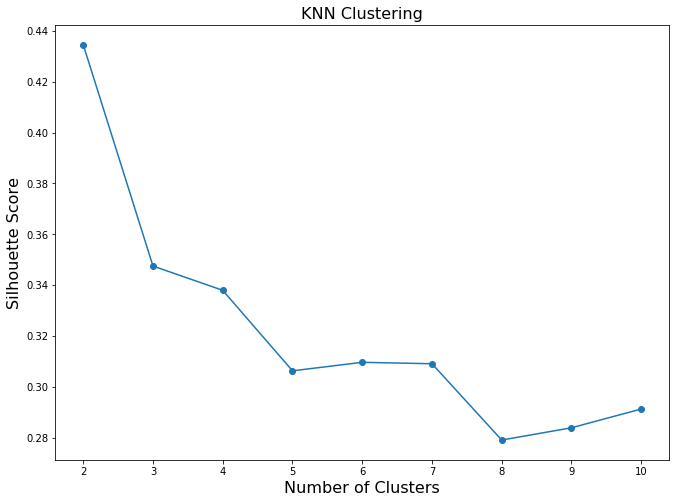

In [86]:
plt.figure(figsize=(11, 8))
plt.plot(range_n_clusters, score, '-o')
plt.title('KNN Clustering', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=16) 
plt.ylabel('Silhouette Score', fontsize=16)
plt.show()

In [87]:
from scipy.spatial.distance import cdist, pdist
#draw elbow plot
def elbow(df, n):
    kMeansVar = [KMeans(n_clusters=k).fit(df.values) for k in range(1, n)]
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(df.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(df.values)**2)/df.values.shape[0]
    bss = tss - wcss
    percentage=bss/tss
    plt.figure(figsize=(11,8))
    plt.plot(percentage)
    plt.title('Elbow Plot', fontsize=16)
    plt.xlabel('Number of Clusters', fontsize=16)
    plt.ylabel('Percentage of Variance Explained', fontsize=16)
    plt.show()

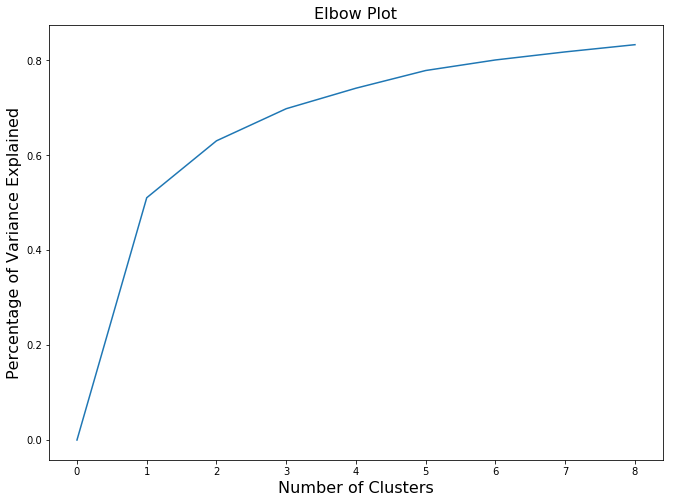

In [88]:
elbow(scaled_data,10)

In [101]:
warnings.filterwarnings('ignore')
for n_clusters in range_n_clusters:
    
    clusterer = GMM(n_components=n_clusters).fit(scaled_data)

    
    preds = clusterer.predict(scaled_data)

    
    centers = clusterer.means_


    
    score = silhouette_score(scaled_data, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.242561526285456
For n_clusters = 3. The average silhouette_score is : 0.16381144608971143
For n_clusters = 4. The average silhouette_score is : 0.12094183700800121
For n_clusters = 5. The average silhouette_score is : 0.0853235968593159
For n_clusters = 6. The average silhouette_score is : 0.0738779605922671
For n_clusters = 7. The average silhouette_score is : 0.06097182708184706
For n_clusters = 8. The average silhouette_score is : 0.050242792114142544
For n_clusters = 9. The average silhouette_score is : 0.02017863079922812
For n_clusters = 10. The average silhouette_score is : 0.056784484687177054


In [102]:
warnings.filterwarnings('ignore')
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        
        gmm = GMM(n_components=n_components, covariance_type=cv_type)
        gmm.fit(scaled_data)
        bic.append(gmm.bic(scaled_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [91]:
pred=DBSCAN(eps=0.3, min_samples=30).fit_predict(scaled_data)

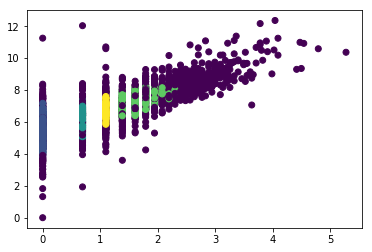

In [92]:
plt.scatter(customers.FrequencyLog,customers.MonetaryLog, c=pred)
plt.show()

In [93]:
clusterer2 = KMeans(n_clusters=2).fit(scaled_data)

    
preds2 = clusterer2.predict(scaled_data)

In [94]:
clusterer5 = KMeans(n_clusters=5).fit(scaled_data)

    
preds5 = clusterer5.predict(scaled_data)

In [95]:
customers['Cluster_2']=preds2


In [96]:
customers['Cluster_5']=preds5

In [97]:
customers.head()

,CustomerID,Recency,Frequency,Monetary,Pareto,RecencyLog,FrequencyLog,MonetaryLog,RecencyScale,FrequencyScale,MonetaryScale,Cluster_2,Cluster_5
0,12346,325,1,77183.60,Top 20%,5.783825,0.000000,11.253942,1.425140,-1.042054,3.795425,0,1
1,12747,2,10,3837.45,Top 20%,0.693147,2.302585,8.252563,-2.057858,1.537518,1.383611,0,0
2,12748,0,196,31854.58,Top 20%,0.001000,5.278115,10.368936,-2.531419,4.870985,3.084262,0,0
3,12749,3,5,4090.88,Top 20%,1.098612,1.609438,8.316515,-1.780442,0.760989,1.435001,0,0
4,12820,3,4,942.34,Bottom 80%,1.098612,1.386294,6.848366,-1.780442,0.511003,0.255243,0,3


In [98]:
from mpl_toolkits.mplot3d import Axes3D

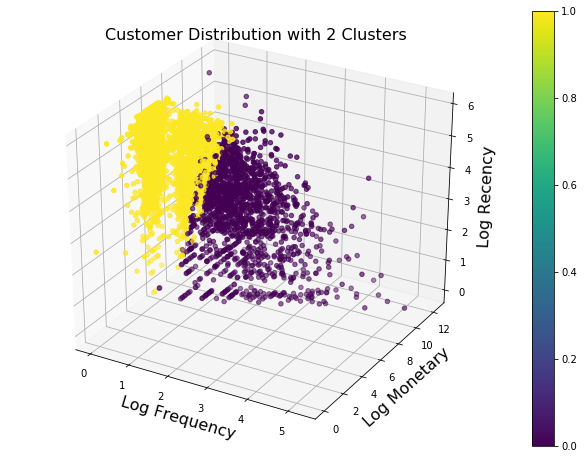

In [99]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')
points=ax.scatter(customers.FrequencyLog, customers.MonetaryLog, customers.RecencyLog, c=customers.Cluster_2) 
ax.set_title('Customer Distribution with 2 Clusters', fontsize=16)
ax.set_xlabel('Log Frequency',fontsize=16)
ax.set_ylabel('Log Monetary',fontsize=16)
ax.set_zlabel('Log Recency',fontsize=16)
plt.colorbar(points)
plt.show()

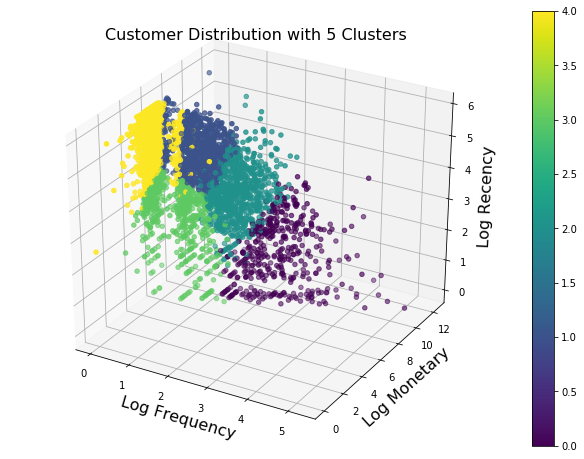

In [100]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')
points=ax.scatter(customers.FrequencyLog, customers.MonetaryLog, customers.RecencyLog, c=customers.Cluster_5) 
ax.set_title('Customer Distribution with 5 Clusters', fontsize=16)
ax.set_xlabel('Log Frequency',fontsize=16)
ax.set_ylabel('Log Monetary',fontsize=16)
ax.set_zlabel('Log Recency',fontsize=16)
fig.colorbar(points)
plt.show()